# Movie Reviews using Random forest K-fold  Classifiers :

In [52]:
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
import re
import string
import seaborn as sns

import matplotlib.pyplot as plt


from nltk.stem import WordNetLemmatizer
from collections import Counter


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import plot_tree
from wordcloud import WordCloud

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [53]:
test_csv = pd.read_csv('test_data (1).csv')
train_csv = pd.read_csv('train_data (1).csv')

train_X = train_csv['0']   # '0' corresponds to Texts/Reviews
train_y = train_csv['1']   # '1' corresponds to Label (1 - positive and 0 - negative)
test_X = test_csv['0']
test_y = test_csv['1']

In [26]:
# Checking for null values in train and test datasets
print("Train Dataset - Null Values:")
print(train_csv.isnull().sum())

print("\nTest Dataset - Null Values:")
print(test_csv.isnull().sum())


Train Dataset - Null Values:
0    0
1    0
dtype: int64

Test Dataset - Null Values:
0    0
1    0
dtype: int64


In [27]:
# Class distribution
print("\nClass Distribution:")
print(train_csv['1'].value_counts())

# Review length distribution
train_csv['Review_Length'] = train_csv['0'].apply(lambda x: len(x.split()))
print("\nReview Length Distribution:")
print(train_csv['Review_Length'].describe())



Class Distribution:
0    12500
1    12500
Name: 1, dtype: int64

Review Length Distribution:
count    25000.000000
mean       233.787200
std        173.733032
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: Review_Length, dtype: float64


### Checking Most Common words:

In [28]:
# Tokenize and count words in positive and negative reviews
positive_words = ' '.join(train_X[train_y == 1]).split()
negative_words = ' '.join(train_X[train_y == 0]).split()

# Calculate word frequencies
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# Print most common words
print("Top 10 Most Common Words in Positive Reviews:", positive_word_freq.most_common(10))
print("Top 10 Most Common Words in Negative Reviews:", negative_word_freq.most_common(10))


Top 10 Most Common Words in Positive Reviews: [('the', 148414), ('and', 84276), ('a', 79428), ('of', 75341), ('to', 65209), ('is', 55358), ('in', 45796), ('that', 31943), ('I', 30928), ('it', 26991)]
Top 10 Most Common Words in Negative Reviews: [('the', 138618), ('a', 75668), ('and', 68388), ('of', 67631), ('to', 67359), ('is', 47871), ('in', 39784), ('I', 35045), ('that', 32617), ('this', 31177)]


## Using tf-idf & then remove Stopwords :

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF vectorizer without removing stop words initially
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_X)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(test_X)

# Remove stop words after TF-IDF transformation
tfidf_vectorizer_stopwords_removed = TfidfVectorizer(stop_words='english')

# Fit and transform the training data again
X_train_tf_stopwords_removed = tfidf_vectorizer_stopwords_removed.fit_transform(train_X)

# Transform the test data again
X_test_tf_stopwords_removed = tfidf_vectorizer_stopwords_removed.transform(test_X)


#### Checking Accuracy  :

In [30]:

clf = MultinomialNB()

clf.fit(X_train_tf_stopwords_removed, train_y)
predicted_stopwords_removed = clf.predict(X_test_tf_stopwords_removed)
accuracy_stopwords_removed = metrics.accuracy_score(test_y, predicted_stopwords_removed)
print("Accuracy with stop words removed after TF-IDF: {:.2f}%".format(accuracy_stopwords_removed * 100))


Accuracy with stop words removed after TF-IDF: 82.99%


### Printing words without stopwords :

In [31]:
# Calculate the sum of TF-IDF values for each word after TF-IDF transformation without stop words removal
word_counts_tfidf = X_train_tfidf.sum(axis=0)

# Get the feature names (i.e., words) after TF-IDF transformation without stop words removal
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Create a dictionary to store word counts
word_counts_dict_tfidf = {}

# Populate the dictionary with word counts
for word, count in zip(feature_names_tfidf, word_counts_tfidf.A[0]):
    if count > 0 and not word[0].isdigit() and not word[-1].isdigit():  # Check if count is greater than 0 and word does not start or end with a numerical value
        word_counts_dict_tfidf[word] = int(count)  # Convert count to integer


# Calculate the sum of TF-IDF values for each word after TF-IDF transformation with stop words removal
word_counts_tf_stopwords_removed = X_train_tf_stopwords_removed.sum(axis=0)

# Get the feature names after TF-IDF transformation with stop words removal
feature_names_tf_stopwords_removed = tfidf_vectorizer_stopwords_removed.get_feature_names_out()

word_counts_dict_tf_stopwords_removed = {}

# Populate the dictionary with word counts
for word, count in zip(feature_names_tf_stopwords_removed, word_counts_tf_stopwords_removed.A[0]):
    if count > 0 and not word[0].isdigit() and not word[-1].isdigit(): 
        word_counts_dict_tf_stopwords_removed[word] = int(count)  

print("\nCount of words after TF-IDF transformation with stop words removal:")
for word, count in word_counts_dict_tf_stopwords_removed.items():
    if count > 0:  # Check if count is greater than 0
        print(f"{word}: {count}")


Count of words after TF-IDF transformation with stop words removal:
aag: 1
aames: 1
aardman: 1
aaron: 3
ab: 2
aback: 1
abandon: 4
abandoned: 14
abandoning: 1
abandonment: 1
abandons: 1
abbas: 1
abbey: 1
abbot: 2
abbott: 2
abby: 1
abc: 15
abducted: 2
abduction: 1
abe: 2
abel: 1
abetted: 1
abhay: 2
abhorrent: 1
abiding: 2
abigail: 2
abilities: 8
ability: 30
abject: 1
able: 74
ably: 2
abnormal: 1
abo: 2
aboard: 2
abominable: 3
abomination: 5
aboriginal: 2
aborigine: 1
aborigines: 2
aborted: 1
abortion: 5
abound: 5
abounds: 1
abraham: 7
abrasive: 1
abridged: 1
abroad: 3
abrupt: 6
abruptly: 5
absence: 9
absent: 7
absolute: 28
absolutely: 100
absolutley: 1
absolutly: 1
absorb: 1
absorbed: 6
absorbing: 5
abstract: 4
absurd: 24
absurdist: 2
absurdities: 1
absurdity: 7
absurdly: 2
abu: 2
abundance: 4
abundant: 2
abuse: 15
abused: 7
abuses: 1
abusing: 1
abusive: 7
abysmal: 10
abysmally: 1
abyss: 2
academic: 3
academy: 24
accent: 35
accented: 1
accents: 18
accept: 22
acceptable: 12
acceptance: 5

## K-fold :
##### Used to cross-validation to evaluate model performance more reliably.

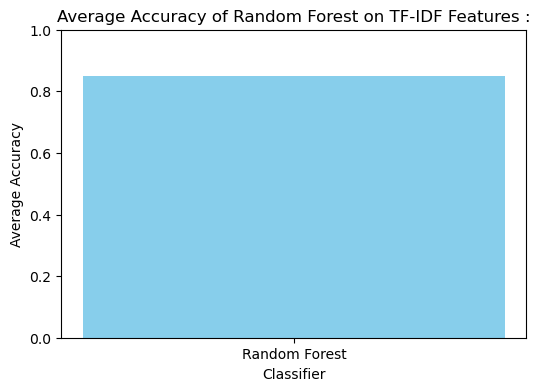

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf_classifier = RandomForestClassifier()

# Perform k-fold cross-validation
accuracies = cross_val_score(rf_classifier, X_train_tf_stopwords_removed, train_y, cv=5)  # Assuming k=5 for 5-fold cross-validation

avg_accuracy = accuracies.mean()

# Visualize the average accuracy
plt.figure(figsize=(6, 4))
plt.bar(["Random Forest"], [avg_accuracy], color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of Random Forest on TF-IDF Features :')
plt.ylim(0, 1)
plt.show()


# Real time Prediction :
### With its accuracy

In [55]:
example_review = "This movie was fantastic! I absolutely loved it."

# Predict sentiment for the example review
example_sentiment = predict_sentiment(example_review, rf_classifier, tfidf_vectorizer_stopwords_removed)
print("Predicted Sentiment for Example Review:", example_sentiment)

Predicted Sentiment for Example Review: Positive
Accuracy for Example Predictions: 0.0


C:\Users\msate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
